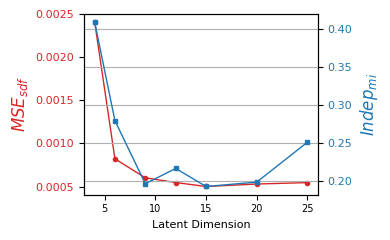

In [19]:
metrics_path = "../src/metrics_lat_dim2.json"
prefix = "uba_AE_DeepSDF_minMI_ldim"

import json

with open(metrics_path, 'r') as file:
    metrics = json.load(file)

metrics_keys = metrics.keys()
# print(metrics_keys)
lat_dims_list = [int(key.split(prefix)[-1]) for key in metrics_keys if prefix in key]
lat_dims_list.sort()

# print(lat_dims_list)

headers = ['val_sdf_loss/dataloader_idx_0',
            'val_tau_loss/dataloader_idx_0',
            'val_reg_loss/dataloader_idx_0',
            'val_smoothness_diff/dataloader_idx_1',
            'val_mi_original/dataloader_idx_2', 
            'val_mi_tau/dataloader_idx_2', 
            'val_mi_ratio/dataloader_idx_2', 
            'val_z_std_ratio/dataloader_idx_2',
            'val_reconstruction_loss'
            ]

table_headers = [
    'MSE_sdf', 'MSE_tau', 'L_reg', 'smoothness_diff',
    'MI_original', 'MI_tau', 'ratio_mi', 'ratio_std', 'MSE_chi'
    #   'MSE_tau_2'
]

latex_table_headers = [
    r"$MSE_{sdf}$", r"$MSE_{\tau}$*",
    r"$L_{reg}$", r"Smooth",
    r"$MI_{original}$", r"$MI_{\tau}$", r"$Indep_{mi}$", r"ratio_{std}", r"$MSE_{\chi}$"
    #   r"$MSE_{\tau}$"
]

metric_index_for_left_plot = 0
metric_index_for_right_plot = 6

import matplotlib.pyplot as plt

# Extract the metrics for the left and right plots
left_metric_values = [metrics[f"{prefix}{dim}"][headers[metric_index_for_left_plot]] for dim in lat_dims_list]
right_metric_values = [metrics[f"{prefix}{dim}"][headers[metric_index_for_right_plot]] for dim in lat_dims_list]
# Plot the metrics
fig, ax1 = plt.subplots(figsize=(4, 2.5))  # Adjusted for two-column paper format

# Plotting the first metric
color = 'tab:red'
ax1.set_xlabel('Latent Dimension', fontsize=8)
ax1.set_ylabel(latex_table_headers[metric_index_for_left_plot], color=color, fontsize=12)
ax1.plot(lat_dims_list, left_metric_values, color=color, linewidth=1, marker='o', markersize=3)
ax1.tick_params(axis='y', labelcolor=color, labelsize=8)
ax1.tick_params(axis='x', labelsize=7)

# Plotting the second metric
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel(latex_table_headers[metric_index_for_right_plot], color=color, fontsize=12)
ax2.plot(lat_dims_list, right_metric_values, color=color, linewidth=1, marker='s', markersize=3)
ax2.tick_params(axis='y', labelcolor=color, labelsize=8)

fig.tight_layout()
plt.grid(True)

# Save the figure
filename = '../paper/icml2025/latex_figures/latent_dim_curves.png'
fig.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()




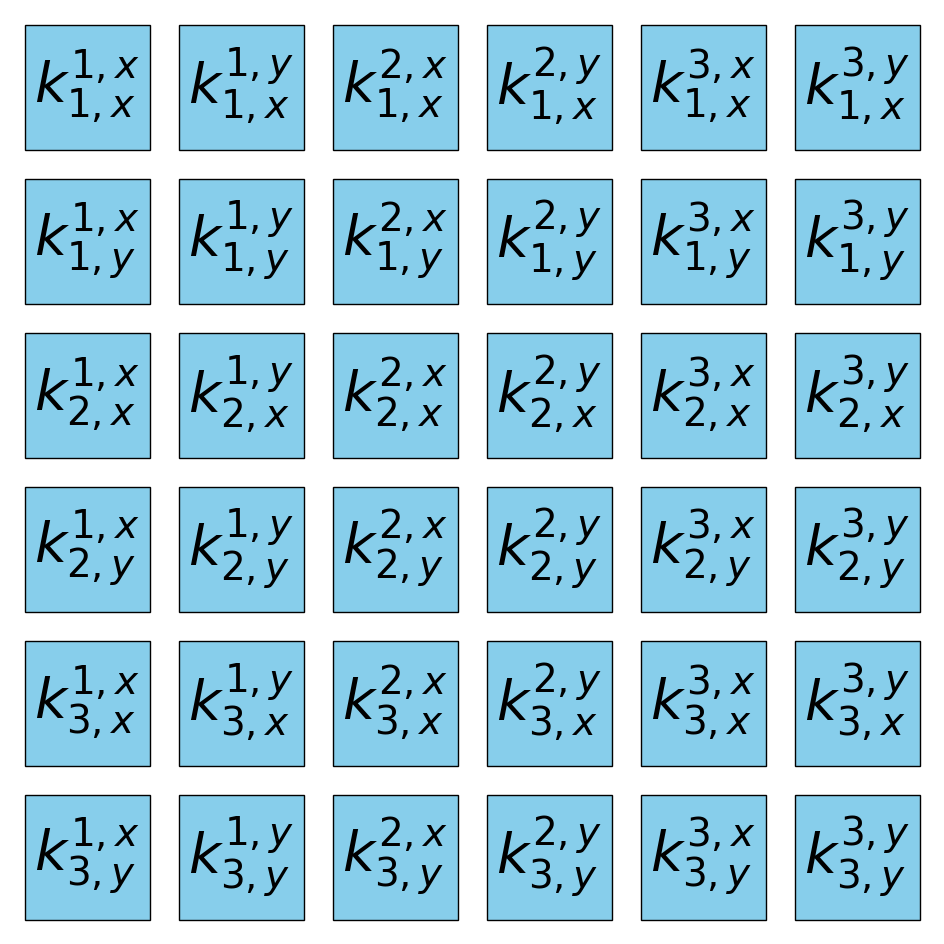

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Create a 6x6 matrix with random values
matrix = np.ones((6, 6))

fig, ax = plt.subplots(figsize=(12, 12))
cmap = colors.ListedColormap(['white', 'black'])
bounds = [0, 0.5, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)

ids = ['1,x', '1,y', '2,x', '2,y', '3,x', '3,y']

# Plot the matrix in spy format
ax.spy(matrix > 0.5, markersize=90, marker="s", color='black', markerfacecolor='skyblue', linewidth=100)

# Add labels inside the cells
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(j, i, f'$k_{{{ids[i]}}}^{{{ids[j]}}}$', ha='center', va='center', fontsize=40)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_frame_on(False)

filename = '../paper/icml2025/latex_figures/spy_matrix_k.png'
fig.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()


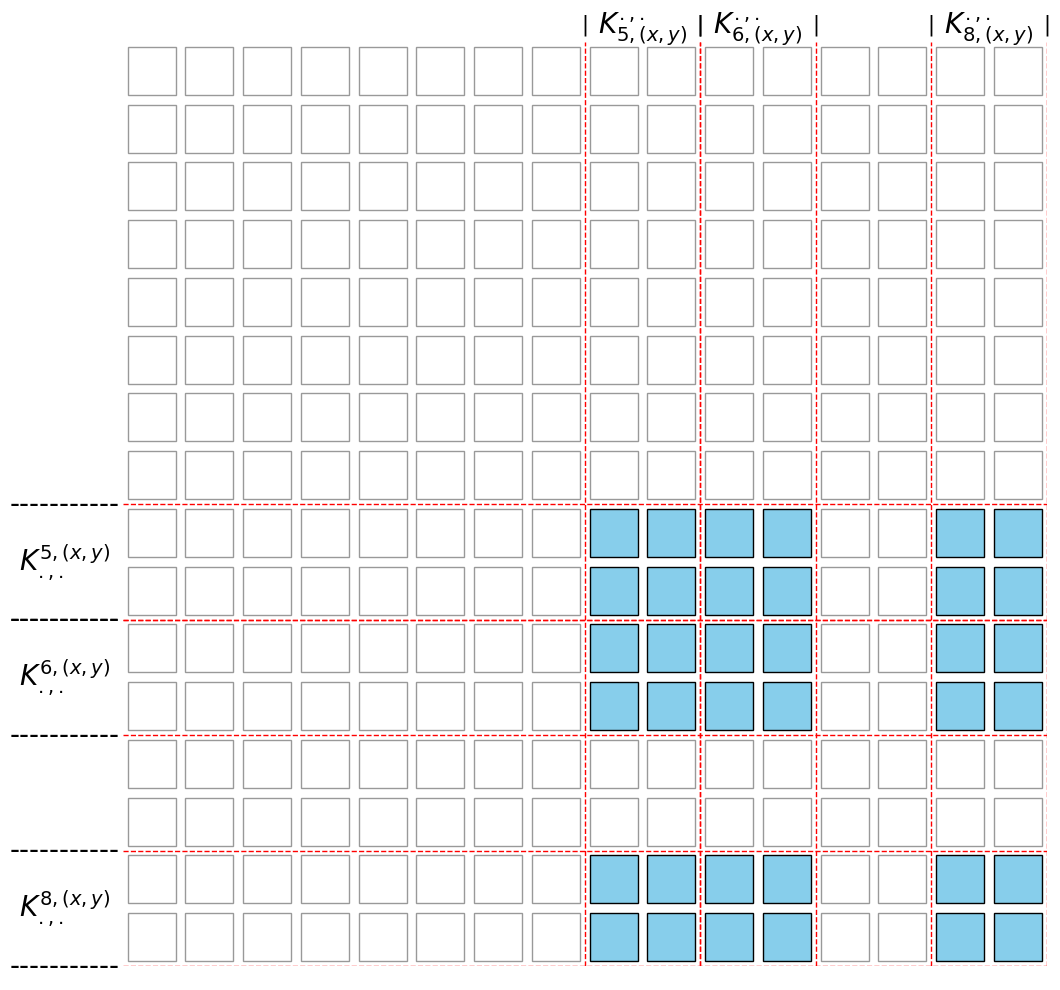

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Create a 6x6 matrix with random values
matrix = np.zeros((16, 16))

suffix = ['x', 'y']
text_lables_upper = []
text_lables_lower = []
element_nodes = [5, 6, 8]
non_zero_indices = []

for i in range(len(element_nodes)):
    non_zero_indices.append(element_nodes[i] * 2 - 2)
    non_zero_indices.append(element_nodes[i] * 2 - 1)

for i in element_nodes:
    for j in suffix:
        text_lables_upper.append(f'$K_{{{i},{j}}}$')
        text_lables_lower.append(f'$K^{{{i},{j}}}$')

for i in range(len(non_zero_indices)):
    for j in range(len(non_zero_indices)):
        matrix[non_zero_indices[i], non_zero_indices[j]] = 1

fig, ax = plt.subplots(figsize=(12, 12))
# Plot the matrix in spy format
ax.spy(matrix > 0.5, markersize=35, marker="s", color='black', markerfacecolor='skyblue', linewidth=6)
ax.spy(matrix < 0.5, markersize=35, marker="s", color='black', markerfacecolor='none', alpha=0.4)

# Add labels inside the cells
# for i in range(matrix.shape[0]):
#     for j in range(matrix.shape[1]):
#         ax.text(j, i, f'$k_{{{ids[i]}}}^{{{ids[j]}}}$', ha='center', va='center', fontsize=40)

# ax.text(5, -1, f'$k_e$', ha='center', va='center', fontsize=30)

# for i in range(len(text_lables_upper)):
#     ax.text(non_zero_indices[i], -0.75, text_lables_upper[i], ha='center', va='center', fontsize=17)

short_text_lables_upper = ['$K_{5,(x,y)}^{.,.}$', '$K_{6,(x,y)}^{.,.}$', '$K_{8,(x,y)}^{.,.}$']
short_text_lables_lower = ['$K^{5,(x,y)}_{.,.}$', '$K^{6,(x,y)}_{.,.}$', '$K^{8,(x,y)}_{.,.}$']

for i in range(len(element_nodes)):
    ax.text(element_nodes[i]*2-1.5, -0.75, short_text_lables_upper[i], ha='center', va='center', fontsize=20)
    ax.text(-1.5, element_nodes[i]*2-1.5, short_text_lables_lower[i], ha='center', va='center', fontsize=20)
# Draw horizontal lines through the points specified by element_nodes
for i in range(len(element_nodes)):
    ax.axhline(y=element_nodes[i]*2-0.5, color='red', linestyle='--', linewidth=1)
    ax.axhline(y=element_nodes[i]*2-2.5, color='red', linestyle='--', linewidth=1)
    ax.text(-1.5, element_nodes[i]*2-0.5, '-----------', ha='center', va='center', fontsize=20)
    ax.text(-1.5, element_nodes[i]*2-2.5, '-----------', ha='center', va='center', fontsize=20)
    ax.text(element_nodes[i]*2-0.5, -0.8, '|', ha='center', va='center', fontsize=15)
    ax.text(element_nodes[i]*2-2.5, -0.8, '|', ha='center', va='center', fontsize=15)
    ax.axvline(x=element_nodes[i]*2-0.5, color='red', linestyle='--', linewidth=1)
    ax.axvline(x=element_nodes[i]*2-2.5, color='red', linestyle='--', linewidth=1)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_frame_on(False)

filename = '../paper/icml2025/latex_figures/spy_matrix_Ke.png'
fig.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()
